In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

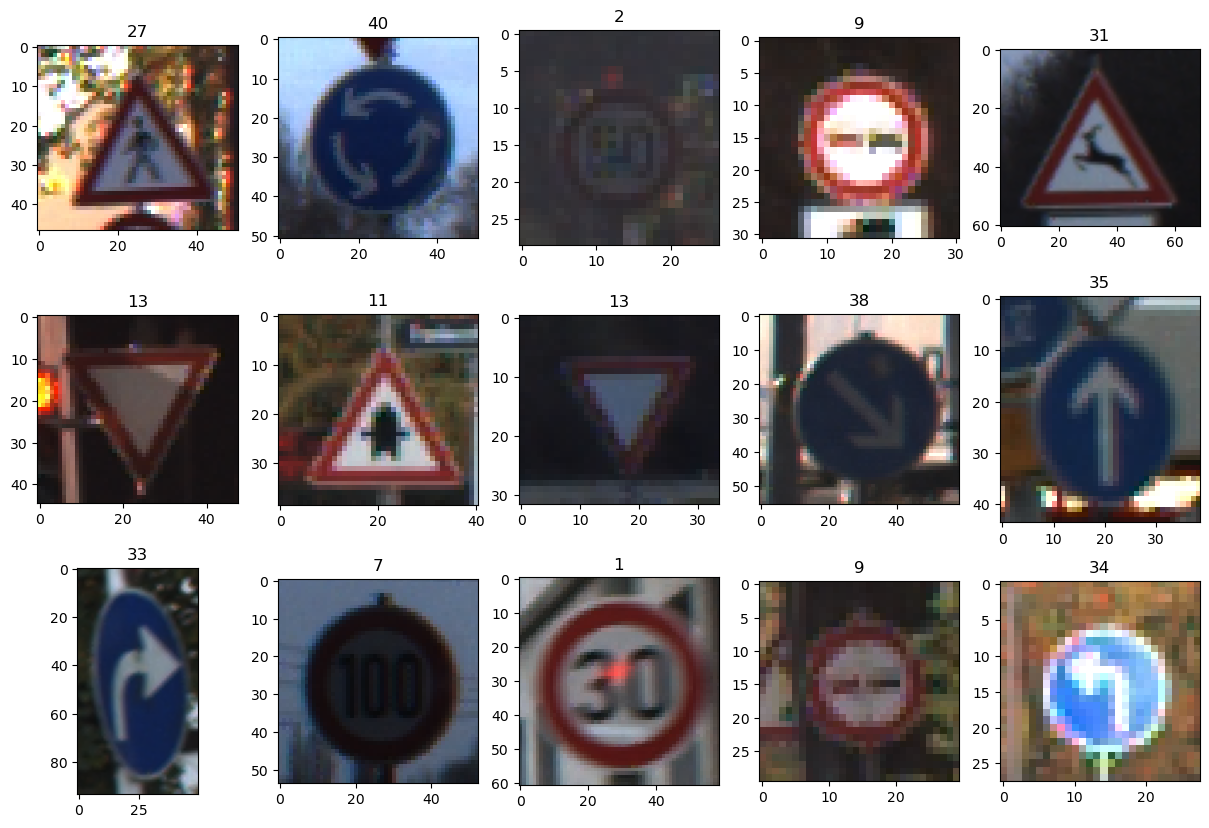

In [2]:
# Load the training labels
root = '/GTSRB' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

In [3]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId'].values

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

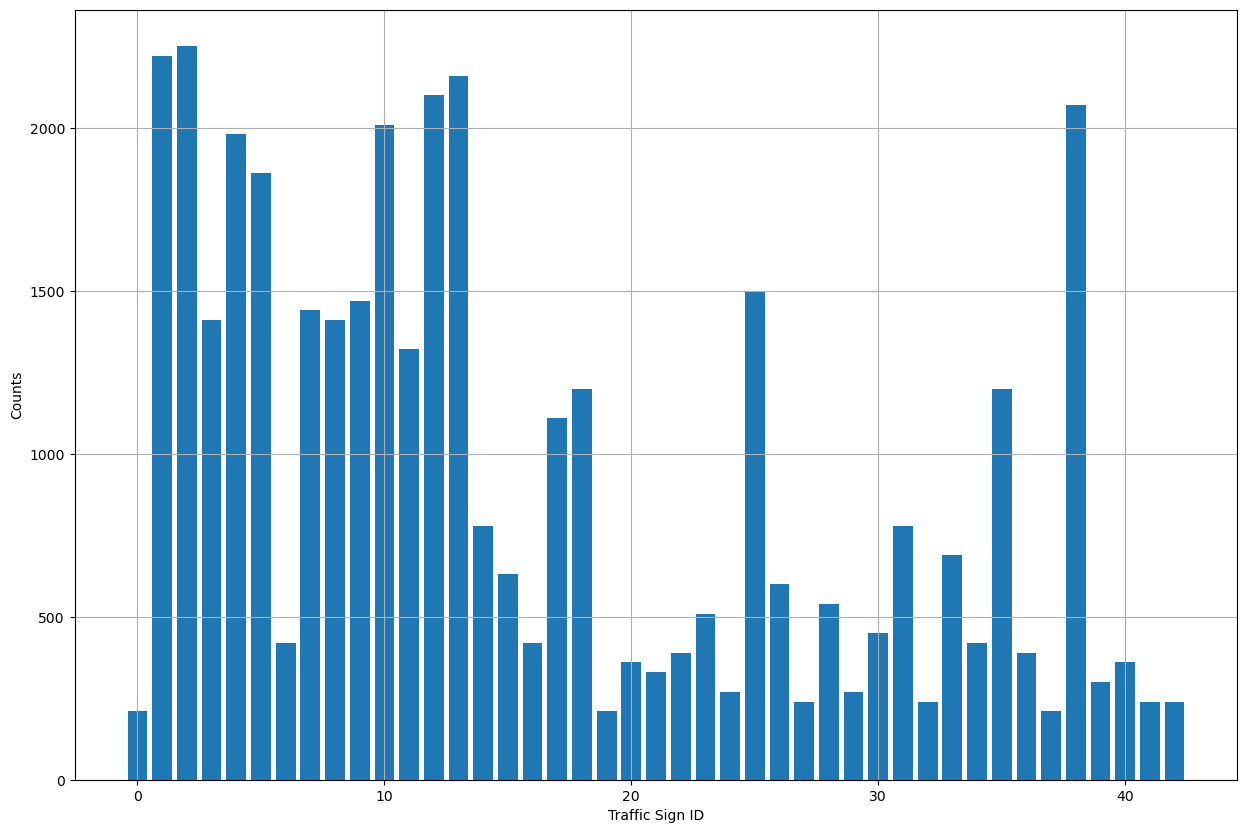

In [4]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

In [ ]:
Questions:
    1) Do you consider the dataset to be balanced? If so, why? If not, why?
        - The dataset is not balanced because the number of samples in each class varies significantly.
        A balanced dataset has approximately the same number of samples for each class, which helps the 
        model to learn and make predictions with equal accuracy for all classes. In this case, for example, 
        classes 1, 2 and 3 have a much higher number of samples (2220, 2250 and 1410 respectively) compared 
        to other classes such as classes 20, 0 and 19, which have a much lower number of samples 
        (360, 210 and 210 respectively).
    2) Are there any classes that are (significantly) over-represented or under-represeneted?
        - Classes 1, 2 and 3 are significantly overrepresented in the dataset because they have a much larger 
        number of samples compared to the other classes. This may bias the model in favour of these classes 
        during training. On the other hand, classes 20, 0 and 19 are underrepresented because they have a much 
        smaller number of samples. This can make it difficult to train the model to recognise these classes with 
        high accuracy due to the limited amount of data to train on.-

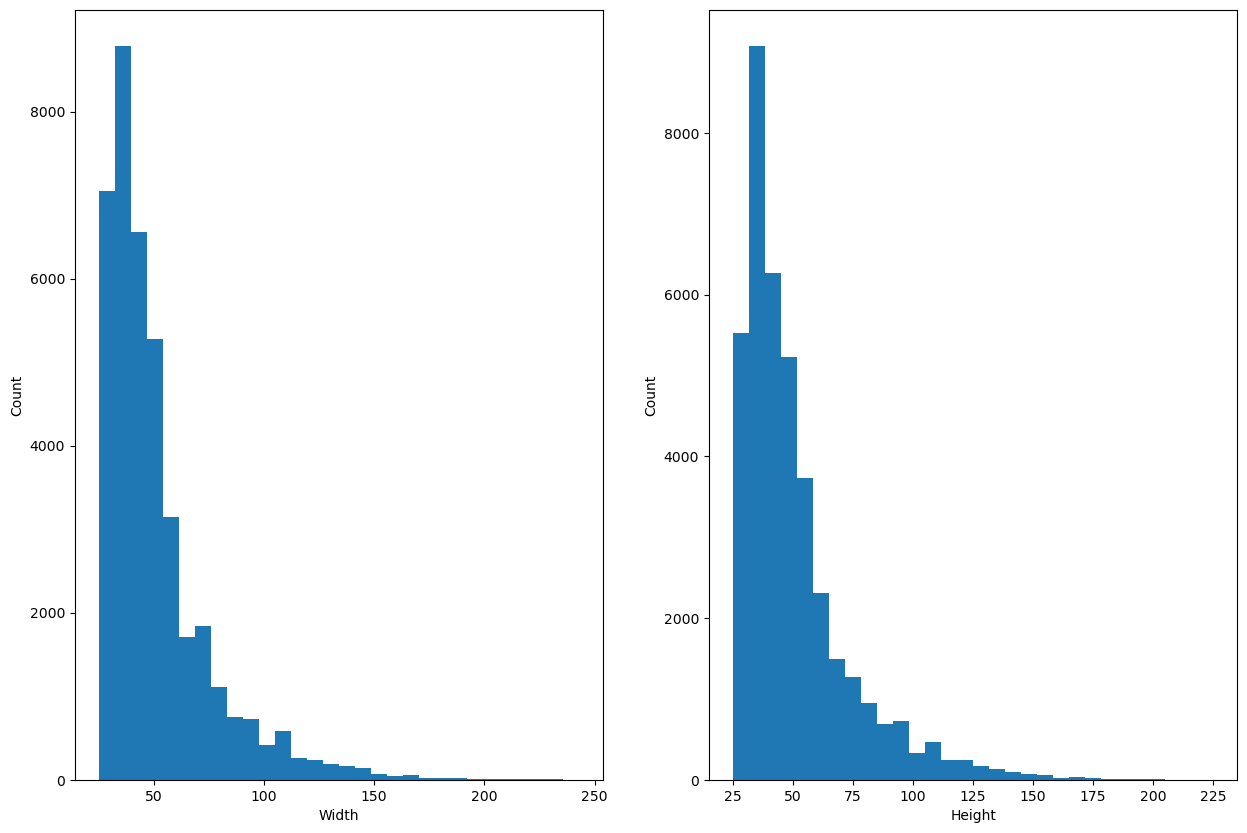

In [5]:
# Image size analysis
image_sizes = []
for idx in range(num_samples):
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    image_sizes.append(img.shape[:2])  # keep the dimensions of the image without the color channel

# Distribution of image sizes
widths = [size[1] for size in image_sizes]
heights = [size[0] for size in image_sizes]
plt.figure()
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30)
plt.xlabel('Width')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.hist(heights, bins=30)
plt.xlabel('Height')
plt.ylabel('Count')

plt.show()

In [ ]:
3) Is there anything we can tell about the resolution distribution?
    - There are a variety of resolutions, which indicate different sizes and proportions of 
    images in the dataset. This can affect the analysis process and model development as the 
    images have different scales.

Text(0, 0.5, 'Count')

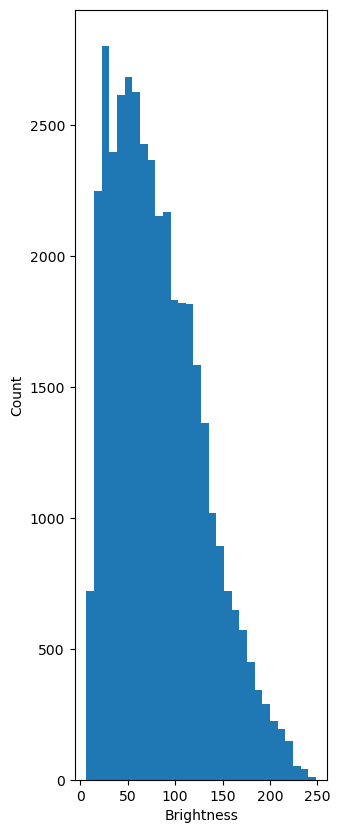

In [6]:
# Analysis of image brightness
brightness_values = []
for idx in range(num_samples):
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    brightness_values.append(np.mean(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)))

plt.subplot(1, 4, 4)
plt.hist(brightness_values, bins=30)
plt.xlabel('Brightness')
plt.ylabel('Count')

In [ ]:
4) What about the brightness distribution? Are there classes there are significantly more bright than others?
    - Yes, there are classes that are much brighter than others.